* 컬럼 항목
    * 엔젤투자자 혹은 액셀러레이터 투자 경험여부
    * 창업당시 창업자 최종학력
    * 창업 직전 근무지
    * 부서별_인력구성(생산)
    * 부서별_인력구성(RnD)
    * 총자산회전율
    * 순이익률
    * 주력제품해외시장점유율(퍼센트)
    * 주력제품국내시장점유율(퍼센트)
    * 학력별 인력구성비(대졸)
    * 창업 당시 목표시장
    * 해외수출 및 진출과정 애로사항
    * 이자보상배율


데이터프레임 -> 원핫인코딩 -> 샘플링 (인코딩과 샘플링 순서는 생각) -> 스케일링 -> 교차검증 -> SHAP

In [52]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [53]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [54]:
data = pd.read_csv('../data/완성data/new_select_data.csv')

In [55]:
data

,벤처확인 유형,엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력,창업 직전 근무지,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),창업 당시 목표시장,해외수출 및 진출과정 애로사항,벤처캐피털(투자조합포함) 투자 경험여부,연구개발관련전담부서보유여부
0,3,0,3,6,0.000,40.000,0.056,-1739.260,360.366,1.00,46.667,1.0,2.0,1,1.0
1,1,0,4,6,0.000,20.000,182.613,3.063,20.487,1.00,20.000,1.0,8.0,0,3.0
2,2,0,2,6,0.000,13.333,47.157,8.065,5.656,10.00,13.333,1.0,4.0,0,1.0
3,2,0,2,6,26.627,23.669,55.927,-6.119,-13.836,30.00,20.000,3.0,3.0,0,1.0
4,2,0,2,6,28.182,22.727,69.228,-11.386,-16.891,30.00,20.000,3.0,2.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,1,0,3,6,0.000,36.364,78.543,-11.720,-26.679,0.01,81.818,1.0,1.0,0,1.0
12380,2,0,3,10,50.000,6.667,603.905,2.822,44.500,15.00,40.000,3.0,2.0,0,3.0
12381,2,0,3,6,0.000,1.923,385.063,-0.801,-15.723,1.00,48.077,1.0,5.0,0,1.0
12382,2,0,3,5,0.000,20.690,511.376,2.205,37.902,5.00,90.000,1.0,2.0,0,2.0


In [56]:
data.columns

Index(['벤처확인 유형', '엔젤투자자 혹은 액셀러레이터 투자 경험여부', '창업 당시 창업자 최종학력', '창업 직전 근무지',
       '부서별_인력구성(생산)', '부서별_인력구성(RnD)', '총자산회전율', '순이익률', 'ROE',
       '주력제품 국내 시장점유율(퍼센트)', '학력별 인력구성비(대졸)', '창업 당시 목표시장', '해외수출 및 진출과정 애로사항',
       '벤처캐피털(투자조합포함) 투자 경험여부', '연구개발관련전담부서보유여부'],
      dtype='object')

In [57]:
# 원하는 컬럼 순서 지정
col = ['부서별_인력구성(생산)', '부서별_인력구성(RnD)', '총자산회전율', '순이익률', 'ROE',
       '주력제품 국내 시장점유율(퍼센트)', '학력별 인력구성비(대졸)',
       '엔젤투자자 혹은 액셀러레이터 투자 경험여부', '창업 당시 창업자 최종학력', '창업 직전 근무지',
       '창업 당시 목표시장', '해외수출 및 진출과정 애로사항', '연구개발관련전담부서보유여부', '벤처확인 유형',
       '벤처캐피털(투자조합포함) 투자 경험여부']

# 컬럼 순서 변경
data = data.reindex(columns=col)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   부서별_인력구성(생산)             12384 non-null  float64
 1   부서별_인력구성(RnD)            12384 non-null  float64
 2   총자산회전율                   12384 non-null  float64
 3   순이익률                     12384 non-null  float64
 4   ROE                      12384 non-null  float64
 5   주력제품 국내 시장점유율(퍼센트)       12384 non-null  float64
 6   학력별 인력구성비(대졸)            12384 non-null  float64
 7   엔젤투자자 혹은 액셀러레이터 투자 경험여부  12384 non-null  int64  
 8   창업 당시 창업자 최종학력           12384 non-null  int64  
 9   창업 직전 근무지                12384 non-null  int64  
 10  창업 당시 목표시장               12384 non-null  float64
 11  해외수출 및 진출과정 애로사항         12384 non-null  float64
 12  연구개발관련전담부서보유여부           12384 non-null  float64
 13  벤처확인 유형                  12384 non-null  int64  
 14  벤처캐피털(투자조합포함) 투자 경험여부 

In [59]:
data['창업 당시 목표시장'] = data['창업 당시 목표시장'].astype('int64')
data['해외수출 및 진출과정 애로사항'] = data['해외수출 및 진출과정 애로사항'].astype('int64')
data['연구개발관련전담부서보유여부'] = data['연구개발관련전담부서보유여부'].astype('int64')

In [61]:
data.drop('벤처확인 유형', axis=1, inplace=True)

# One-hot Encodig

In [62]:
# 원-핫 인코딩 적용
df = pd.get_dummies(data, columns=['창업 당시 창업자 최종학력', '창업 직전 근무지', '창업 당시 목표시장', '해외수출 및 진출과정 애로사항', '연구개발관련전담부서보유여부'])
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,벤처캐피털(투자조합포함) 투자 경험여부,창업 당시 창업자 최종학력_1,...,해외수출 및 진출과정 애로사항_3,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4
0,0.000,40.000,0.056,-1739.260,360.366,1.00,46.667,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0.000,20.000,182.613,3.063,20.487,1.00,20.000,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.000,13.333,47.157,8.065,5.656,10.00,13.333,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,26.627,23.669,55.927,-6.119,-13.836,30.00,20.000,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,28.182,22.727,69.228,-11.386,-16.891,30.00,20.000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,0.000,36.364,78.543,-11.720,-26.679,0.01,81.818,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12380,50.000,6.667,603.905,2.822,44.500,15.00,40.000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12381,0.000,1.923,385.063,-0.801,-15.723,1.00,48.077,0,0,0,...,0,0,1,0,0,0,1,0,0,0
12382,0.000,20.690,511.376,2.205,37.902,5.00,90.000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df = df[[col for col in df.columns if col != '벤처캐피털(투자조합포함) 투자 경험여부'] + ['벤처캐피털(투자조합포함) 투자 경험여부']]

In [64]:
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.000,40.000,0.056,-1739.260,360.366,1.00,46.667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.000,20.000,182.613,3.063,20.487,1.00,20.000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.000,13.333,47.157,8.065,5.656,10.00,13.333,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,26.627,23.669,55.927,-6.119,-13.836,30.00,20.000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,28.182,22.727,69.228,-11.386,-16.891,30.00,20.000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,0.000,36.364,78.543,-11.720,-26.679,0.01,81.818,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12380,50.000,6.667,603.905,2.822,44.500,15.00,40.000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12381,0.000,1.923,385.063,-0.801,-15.723,1.00,48.077,0,0,0,...,0,1,0,0,0,1,0,0,0,0
12382,0.000,20.690,511.376,2.205,37.902,5.00,90.000,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# OverSampling

In [65]:
from imblearn.over_sampling import RandomOverSampler

# 원본데이터(12384개)

# 독립변수와 종속변수 설정
X = df.iloc[:,:-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# Random Oversampler 객체 생성
ros = RandomOverSampler(random_state=0)

# Random Oversampling 적용
X_resampled, y_resampled = ros.fit_resample(X, y)

# 오버샘플링 적용 후의 데이터셋 확인
print(X_resampled.shape, y_resampled.shape)

(22934, 38) (22934,)


In [66]:
# 오버샘플링된 데이터를 데이터프레임으로 변환
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] = y_resampled

pd.reset_option('display.max_rows', None)
df_resampled

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.000,40.000,0.056,-1739.260,360.366,1.0,46.667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.000,20.000,182.613,3.063,20.487,1.0,20.000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.000,13.333,47.157,8.065,5.656,10.0,13.333,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,26.627,23.669,55.927,-6.119,-13.836,30.0,20.000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,28.182,22.727,69.228,-11.386,-16.891,30.0,20.000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22929,21.951,16.260,70.325,12.348,9.960,0.1,52.033,0,0,0,...,0,0,0,1,0,1,0,0,0,1
22930,17.857,7.143,90.675,23.865,23.836,15.0,42.857,0,0,0,...,0,0,0,1,0,1,0,0,0,1
22931,81.538,2.564,135.511,-2.210,-36.709,5.0,26.667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
22932,56.000,20.000,46.206,-94.850,-125.154,10.0,32.000,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [67]:
print(len(df_resampled[df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] == 1].index))
print(len(df_resampled[df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] == 0].index))

11467
11467


In [70]:
# df_resampled.to_csv('oversampling_data.csv', index=False)

# Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
df = pd.read_csv('../data/완성data/oversampling_data.csv')
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.000,40.000,0.056,-1739.260,360.366,1.0,46.667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.000,20.000,182.613,3.063,20.487,1.0,20.000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.000,13.333,47.157,8.065,5.656,10.0,13.333,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,26.627,23.669,55.927,-6.119,-13.836,30.0,20.000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,28.182,22.727,69.228,-11.386,-16.891,30.0,20.000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22929,21.951,16.260,70.325,12.348,9.960,0.1,52.033,0,0,0,...,0,0,0,1,0,1,0,0,0,1
22930,17.857,7.143,90.675,23.865,23.836,15.0,42.857,0,0,0,...,0,0,0,1,0,1,0,0,0,1
22931,81.538,2.564,135.511,-2.210,-36.709,5.0,26.667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
22932,56.000,20.000,46.206,-94.850,-125.154,10.0,32.000,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [73]:
df.iloc[:,:7]

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸)
0,0.000,40.000,0.056,-1739.260,360.366,1.0,46.667
1,0.000,20.000,182.613,3.063,20.487,1.0,20.000
2,0.000,13.333,47.157,8.065,5.656,10.0,13.333
3,26.627,23.669,55.927,-6.119,-13.836,30.0,20.000
4,28.182,22.727,69.228,-11.386,-16.891,30.0,20.000
...,...,...,...,...,...,...,...
22929,21.951,16.260,70.325,12.348,9.960,0.1,52.033
22930,17.857,7.143,90.675,23.865,23.836,15.0,42.857
22931,81.538,2.564,135.511,-2.210,-36.709,5.0,26.667
22932,56.000,20.000,46.206,-94.850,-125.154,10.0,32.000


In [74]:
# 비율형 변수만 분리
tran_df = df.iloc[:,:7]

In [75]:
# 분리한 데이터 Scaling
mm = MinMaxScaler()
mm_tran_df = mm.fit_transform(tran_df)
mm_tran_df = pd.DataFrame(mm_tran_df, columns=tran_df.columns)

In [76]:
# 원본데이터에 Scaling 데이터 치환
df.iloc[:,:7] = mm_tran_df
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_4,해외수출 및 진출과정 애로사항_5,해외수출 및 진출과정 애로사항_6,해외수출 및 진출과정 애로사항_7,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.00000,0.40000,0.000030,0.000000,0.740643,0.010,0.46667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.00000,0.20000,0.097721,0.909954,0.623444,0.010,0.20000,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.00000,0.13333,0.025235,0.912567,0.618330,0.100,0.13333,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0.26627,0.23669,0.029928,0.905159,0.611608,0.300,0.20000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.28182,0.22727,0.037046,0.902408,0.610555,0.300,0.20000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22929,0.21951,0.16260,0.037633,0.914803,0.619814,0.001,0.52033,0,0,0,...,0,0,0,1,0,1,0,0,0,1
22930,0.17857,0.07143,0.048522,0.920818,0.624599,0.150,0.42857,0,0,0,...,0,0,0,1,0,1,0,0,0,1
22931,0.81538,0.02564,0.072515,0.907200,0.603721,0.050,0.26667,0,0,0,...,0,0,0,0,0,1,0,0,0,1
22932,0.56000,0.20000,0.024726,0.858818,0.573223,0.100,0.32000,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [77]:
# df.to_csv('scaling_data_1vs1.csv', index=False)

# Cross-validation

In [19]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [20]:
from sklearn.model_selection import cross_val_score, cross_validate

In [21]:
df  = pd.read_csv('../data/완성data/scaling_data.csv')
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력_1,창업 당시 창업자 최종학력_2,...,해외수출 및 진출과정 애로사항_8,연구개발관련전담부서보유여부_1,연구개발관련전담부서보유여부_2,연구개발관련전담부서보유여부_3,연구개발관련전담부서보유여부_4,벤처확인 유형_1,벤처확인 유형_2,벤처확인 유형_3,벤처확인 유형_4,벤처캐피털(투자조합포함) 투자 경험여부
0,0.00000,0.40000,0.000030,0.000000,0.740643,0.010,0.46667,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,0.00000,0.20000,0.097721,0.909954,0.623444,0.010,0.20000,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0.00000,0.13333,0.025235,0.912567,0.618330,0.100,0.13333,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0.26627,0.23669,0.029928,0.905159,0.611608,0.300,0.20000,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0.28182,0.22727,0.037046,0.902408,0.610555,0.300,0.20000,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22929,0.21951,0.16260,0.037633,0.914803,0.619814,0.001,0.52033,0,0,0,...,0,1,0,0,0,0,1,0,0,1
22930,0.17857,0.07143,0.048522,0.920818,0.624599,0.150,0.42857,0,0,0,...,0,1,0,0,0,0,1,0,0,1
22931,0.81538,0.02564,0.072515,0.907200,0.603721,0.050,0.26667,0,0,0,...,0,1,0,0,0,0,0,1,0,1
22932,0.56000,0.20000,0.024726,0.858818,0.573223,0.100,0.32000,0,1,0,...,0,1,0,0,0,0,0,0,1,1


> Random Forest

In [38]:
# cross_val_score

X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# 모델 생성
model = RandomForestClassifier(max_depth=10)

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
f1scores = cross_val_score(model, X, y, scoring='f1', cv=cv)
accuracyscore = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

# 결과 출력
print('Cross-Validation F1 scores : ', f1scores)
print('Mean F1 score : ', f1scores.mean())
print('Cross-Validation Accuracy scores:', accuracyscore)
print('Mean Accuracy:', accuracyscore.mean())

Cross-Validation F1 scores :  [0.89338486 0.87314286 0.88062086 0.88414357 0.88390023]
Mean F1 score :  0.8830384756032956
Cross-Validation Accuracy scores: [0.90102463 0.87769784 0.88859821 0.89012426 0.88835587]
Mean Accuracy: 0.8891601637613114


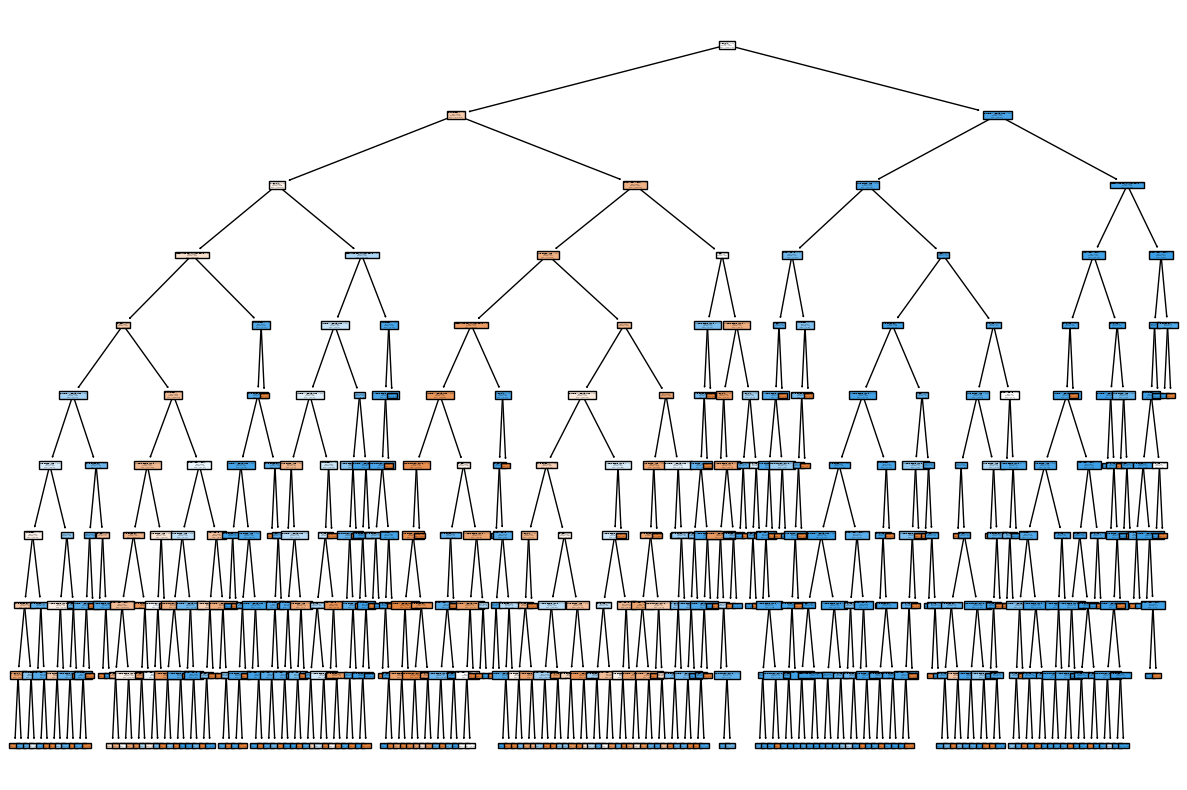

In [48]:
import matplotlib.pyplot as plt
from sklearn import tree

# 모델 훈련
model.fit(X, y)

# 마지막 트리 선택
last_tree = model.estimators_[-1]

# 트리 시각화
plt.figure(figsize=(15, 10))
tree.plot_tree(last_tree, feature_names=X.columns, filled=True)
plt.show()

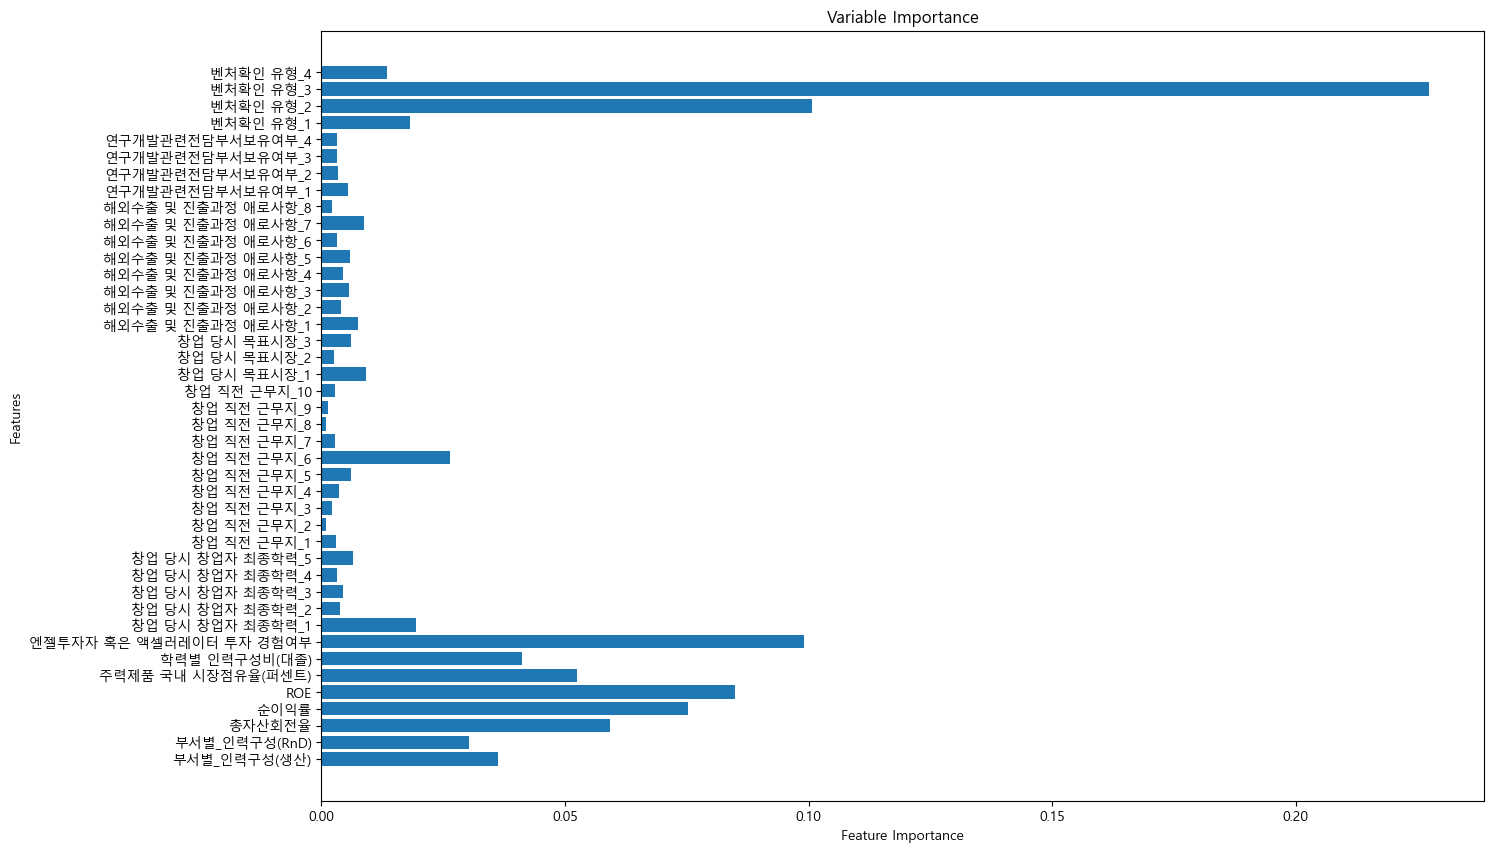

In [49]:
import matplotlib.pyplot as plt

# 변수 중요도 추출
importances = model.feature_importances_

# 변수 중요도 시각화
plt.figure(figsize=(15, 10))
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Variable Importance')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score

> Logistic Regression

In [31]:
# cross_val_score

X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# 모델 생성
lr = LogisticRegression()

# 교차검증 수행
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
l_f1scores = cross_val_score(lr, X, y, scoring='f1', cv=cv)
l_accuracyscore = cross_val_score(lr, X, y, scoring='accuracy', cv=cv)

# 결과 출력
print('Cross-Validation F1 scores : ', l_f1scores)
print('Mean F1 score : ', l_f1scores.mean())
print('Cross-Validation Accuracy scores:', l_accuracyscore)
print('Mean Accuracy:', l_accuracyscore.mean())

Cross-Validation F1 scores :  [0.7860509  0.76152019 0.77068112 0.76555024 0.77351427]
Mean F1 score :  0.7714633437664151
Cross-Validation Accuracy scores: [0.80204927 0.78112056 0.78787879 0.78635274 0.78892281]
Mean Accuracy: 0.789264832038742


---